## Sandox for Developing Resnet
Notes, ideas, and general approach to building Resnet from the ground up.

## General Approach

fastai for data handling and training, pytorch for architecure. 

1. Use fast.ai for downloading data / preprocessing / loading / augmentations etc.
- Create a basic neural network to run through MNIST using pytorch
- Create a loss function and visualize training and metrics using fast.ai
- Create a better neural network with multiple layers and convolutions in pytorch
- Download imagenet
- Create VGG
- Create ResNet
- Create wide ResNet 
- Download COCO
- Try training only on COCO
- Try training on Imagenet, then COCO
- Try making final Detectron Wide Resnet
- Clean up and put into module for use as backbone for any future projects

In [2]:
from fastai.vision import *
from fastai.datasets import *

## NN v1

In [42]:
path = untar_data(URLs.MNIST_SAMPLE)
path

PosixPath('/home/sudosharma/.fastai/data/mnist_sample')

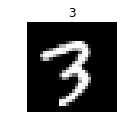

In [87]:
data = ImageDataBunch.from_folder(path)
data.show_batch(rows=1, figsize=(2, 2))

In [65]:
model = simple_cnn((3, 16, 16, 2))

In [66]:
learn = Learner(data, model, metrics=accuracy)
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
1,0.122609,0.101985,0.962709,00:00


## NN v2

In [69]:
model = models.resnet18
learn = create_cnn(data, model, metrics=accuracy)
learn.fit_one_cycle(1, 0.01)

epoch,train_loss,valid_loss,accuracy,time
1,0.036209,0.010152,0.997056,00:02


## NN v3

In [81]:
model = nn.Sequential(
    nn.Conv2d(3, 64, 3, 1), nn.ReLU(True),
    Flatten()
)
learn = Learner(data, model, metrics=accuracy)
learn.fit_one_cycle(1, 0.01)

epoch,train_loss,valid_loss,accuracy,time
1,10.676255,10.675077,0.233072,00:00


TODO:
- need to understand how data loader processing batches